In [1]:
# !pip install art

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D
from art.estimators.classification import KerasClassifier
tf.compat.v1.disable_eager_execution()



x_test = np.load('/home/jovyan/UNSW/x_test.npy',allow_pickle=True)
x_train = np.load('/home/jovyan/UNSW/x_train.npy',allow_pickle=True)
x_val = np.load('/home/jovyan/UNSW/x_val.npy',allow_pickle=True)
y_test = np.load('/home/jovyan/UNSW/y_test.npy',allow_pickle=True)
y_train = np.load('/home/jovyan/UNSW/y_train.npy',allow_pickle=True)
y_val = np.load('/home/jovyan/UNSW/y_val.npy',allow_pickle=True)

2024-02-27 22:46:16.013208: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-27 22:46:16.056509: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-27 22:46:16.056583: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-27 22:46:16.058265: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-27 22:46:16.066220: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-27 22:46:16.067192: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [3]:
input_shape = x_train.shape[1:]
num_classes = len(np.unique(y_train))

dnn_model = Sequential()
dnn_model.add(Input(shape=input_shape))
dnn_model.add(Dense(units=30, activation='relu'))
dnn_model.add(Dense(units=20, activation='relu'))
dnn_model.add(Dense(units=num_classes, activation='softmax'))

dnn_model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
classifier = KerasClassifier(model=dnn_model, use_logits=False)
classifier.fit(x_train, y_train, nb_epochs=10, batch_size=64,validation_data=(x_val, y_val),
                     callbacks=[early_stopping])

test_loss, test_acc = dnn_model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

y_hat = dnn_model.predict(x_test)
y_hat = np.argmax(y_hat, axis=-1)

2024-02-27 22:46:20.217867: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-02-27 22:46:20.274975: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
2024-02-27 22:46:20.295724: W tensorflow/c/c_api.cc:305] Operation '{name:'training/Adam/dense_2/bias/v/Assign' id:291 op device:{requested: '', assigned: ''} def:{{{node training/Adam/dense_2/bias/v/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training/Adam/dense_2/bias/v, training/Adam/dense_2/bias/v/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
/opt/conda/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model

Test accuracy: 0.9211378


/opt/conda/lib/python3.11/site-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2024-02-27 22:46:37.360389: W tensorflow/c/c_api.cc:305] Operation '{name:'dense_2/Softmax' id:74 op device:{requested: '', assigned: ''} def:{{{node dense_2/Softmax}} = Softmax[T=DT_FLOAT, _has_manual_control_dependencies=true](dense_2/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


epsilon = 0.1
FPR: [0.44427686 0.52884615]
TPR: [0.47115385 0.55572314]
FNR: [0.52884615 0.44427686]
TNR: [0.55572314 0.47115385]
Accuracy: 0.5287134446482
Precision(micro,macro,weighted): 0.5287134446482,0.5117896287311472,0.5766356431677208
F1(micro,macro,weighted: 0.5287134446482,0.5029280993365663,0.5438252582789065
FPR: 0.48656150494385786
tpr: 0.5134384950561421
fnr: 0.48656150494385786
tnr: 0.5134384950561421


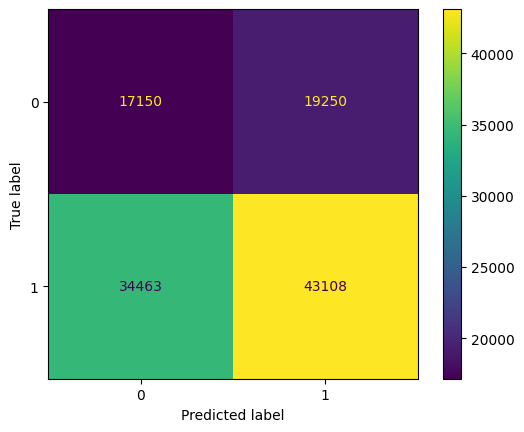

epsilon = 0.15
FPR: [0.84879659 0.72337912]
TPR: [0.27662088 0.15120341]
FNR: [0.72337912 0.84879659]
TNR: [0.15120341 0.27662088]
Accuracy: 0.19125917996683367
Precision(micro,macro,weighted): 0.19125917996683367,0.2204067407657111,0.2521109024959318
F1(micro,macro,weighted: 0.19125917996683364,0.19108757535135507,0.19534367994404747
FPR: 0.7860878536161342
tpr: 0.21391214638386585
fnr: 0.7860878536161342
tnr: 0.21391214638386585


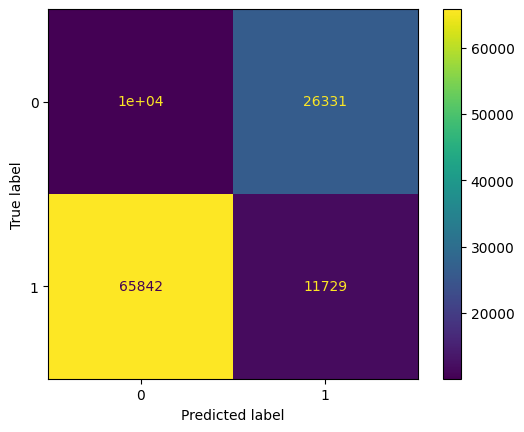

epsilon = 0.2
FPR: [0.97299248 0.96184066]
TPR: [0.03815934 0.02700752]
FNR: [0.96184066 0.97299248]
TNR: [0.02700752 0.03815934]
Accuracy: 0.03056917987909205
Precision(micro,macro,weighted): 0.03056917987909205,0.03726525752728897,0.04419913948744681
F1(micro,macro,weighted: 0.03056917987909205,0.030531978916947373,0.03270138516688868
FPR: 0.9674165718226804
tpr: 0.03258342817731958
fnr: 0.9674165718226804
tnr: 0.03258342817731958


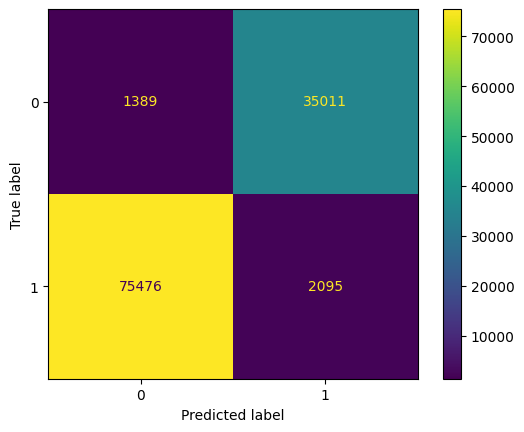

epsilon = 0.25
FPR: [0.99457271 0.99686813]
TPR: [0.00313187 0.00542729]
FNR: [0.99686813 0.99457271]
TNR: [0.00542729 0.00313187]
Accuracy: 0.0046941765887813566
Precision(micro,macro,weighted): 0.0046941765887813566,0.006472331408736784,0.008277406046712593
F1(micro,macro,weighted: 0.0046941765887813566,0.0046869547509913005,0.005655457303611567
FPR: 0.9957204229489297
tpr: 0.004279577051070264
fnr: 0.9957204229489297
tnr: 0.004279577051070264


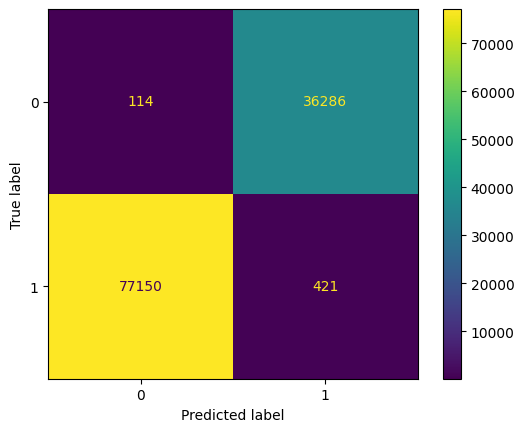

epsilon = 0.3
FPR: [0.99740883 0.99928571]
TPR: [0.00071429 0.00259117]
FNR: [0.99928571 0.99740883]
TNR: [0.00259117 0.00071429]
Accuracy: 0.0019917347395390053
Precision(micro,macro,weighted): 0.0019917347395390053,0.0029157458740654936,0.0038476794969456297
F1(micro,macro,weighted: 0.0019917347395390053,0.0019893817362100223,0.0025429560222532347
FPR: 0.9983472698744192
tpr: 0.0016527301255808043
fnr: 0.9983472698744192
tnr: 0.0016527301255808043


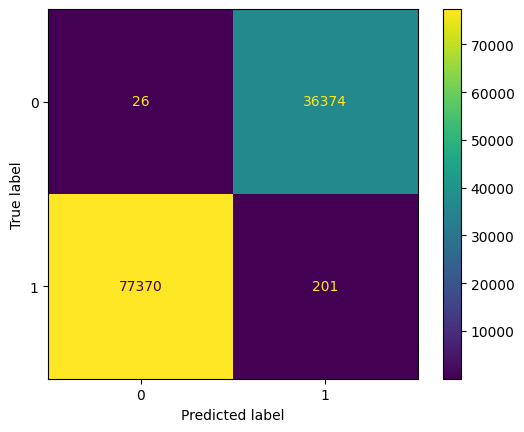

In [4]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from art.attacks.evasion import FastGradientMethod

epsilon_values = [0.1, 0.15, 0.2, 0.25, 0.3]

# Iterate over epsilon values
for epsilon in epsilon_values:
    # Craft adversarial samples with FGSM
    adv_crafter = FastGradientMethod(classifier, eps=epsilon)
    x_test_adv = adv_crafter.generate(x=x_test, y=y_test)

    # Evaluate the classifier on the adversarial examples
    preds = np.argmax(classifier.predict(x_test_adv), axis=1)
    # acc = np.sum(preds == np.argmax(y_test, axis=1)) / y_test.shape[0]
    # print("Test accuracy on adversarial sample (epsilon = %.2f): %.2f%%" % (epsilon, acc * 100))

    y_hat = preds
    # y_test_arg = np.argmax(y_test, axis=1)
    y_test_arg = y_test
    conf_matrix = confusion_matrix(y_test_arg, y_hat)
    # tn, fp, fn, tp = conf_matrix.ravel()
    cm = conf_matrix
    fp = cm.sum(axis=0) - np.diag(cm)
    fn = cm.sum(axis=1) - np.diag(cm)
    tp = np.diag(cm)
    tn = cm.sum() - (fp + fn + tp)
    
    fpr = fp / (fp + tn)
    tpr = tp / (tp + fn)
    fnr = fn / (fn + tp)
    tnr = tn / (tn + fp)
    accuracy = accuracy_score(y_test_arg, y_hat)
    precision_macro = precision_score(y_test_arg, y_hat, average='macro')
    precision_micro = precision_score(y_test_arg, y_hat, average='micro')
    precision_weighted = precision_score(y_test_arg, y_hat, average='weighted')
    f1_weighted = f1_score(y_test_arg, y_hat, average='weighted')
    f1_macro = f1_score(y_test_arg, y_hat, average='macro')
    f1_micro = f1_score(y_test_arg, y_hat, average='micro')
    # auc = roc_auc_score(y_test_arg, y_hat, multi_class='ovr')
    print(f"epsilon = {epsilon}")
    print(f"FPR: {fpr}")
    print(f"TPR: {tpr}")
    print(f"FNR: {fnr}")
    print(f"TNR: {tnr}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision(micro,macro,weighted): {precision_micro},{precision_macro},{precision_weighted}")
    print(f"F1(micro,macro,weighted: {f1_micro},{f1_macro},{f1_weighted}")
    # print(f"AUC: {auc}")
    
    print(f"FPR: {np.mean(fpr)}")
    print(f"tpr: {np.mean(tpr)}")
    print(f"fnr: {np.mean(fnr)}")
    print(f"tnr: {np.mean(tnr)}")
    
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot()
    plt.show()
    
    metrics = {
        "model" : "dnn",
        "attack_model" : "fgsm",
        "epsilon" : epsilon,
        "Accuracy": accuracy,
        "Precision-micro": precision_micro,
        "Precision-macro": precision_macro,
        "Precision-weighted": precision_weighted,
        "F1-micro": f1_micro,
        "F1-macro": f1_macro,
        "F1-weighted": f1_weighted,
        "FPR": np.mean(fpr),
        "TPR": np.mean(tpr),
        "FNR": np.mean(fnr),
        "TNR": np.mean(tnr),
        # "AUC": auc
    }
    metrics_df = pd.DataFrame([metrics])
    metrics_df.to_csv("/home/jovyan/UNSW/modeldnn.csv", mode='a', index=False)
